In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [3]:
%matplotlib inline
sns.set()

In [4]:
movies_df = pd.read_csv('movies_data_20191030_v3.csv')

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6296 entries, 0 to 6295
Data columns (total 74 columns):
tmdb_id                           6296 non-null float64
mojo_title                        6296 non-null object
original_title                    6296 non-null object
tagline                           3619 non-null object
collection_id                     668 non-null float64
budget                            2401 non-null float64
Total_gross                       6296 non-null int64
comments_total_qty                6296 non-null float64
sc_negative                       6296 non-null float64
sc_neutral                        6296 non-null float64
sc_positive                       6296 non-null float64
total_sentiment_level             6296 non-null object
holidayweek                       1019 non-null object
Release_date                      6296 non-null object
Release_year                      6296 non-null int64
Release_month                     6296 non-null int64
Release_we

### drop模型不會使用的欄位

In [6]:
movies_df = movies_df.iloc[:,13:]

In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6296 entries, 0 to 6295
Data columns (total 61 columns):
Release_date                      6296 non-null object
Release_year                      6296 non-null int64
Release_month                     6296 non-null int64
Release_weekday                   6296 non-null int64
release_in_holidayweek            6296 non-null int64
original_language                 6296 non-null object
distributor                       6296 non-null object
belongs_to_collection             6296 non-null int64
homepage                          6296 non-null int64
genres                            6296 non-null object
Adventure                         6296 non-null int64
Fantasy                           6296 non-null int64
Animation                         6296 non-null int64
Drama                             6296 non-null int64
Horror                            6296 non-null int64
Action                            6296 non-null int64
Comedy                   

###  類別標籤編碼

In [8]:
from sklearn.preprocessing import LabelEncoder

original_language

In [9]:
le_lang = LabelEncoder()
label_language = le_lang.fit_transform(movies_df['original_language'].values)
label_language

array([14, 14, 14, ..., 12, 14, 19])

In [10]:
le_lang.inverse_transform(label_language)

array(['en', 'en', 'en', ..., 'de', 'en', 'fr'], dtype=object)

In [11]:
movies_df['original_language'] = label_language

Distributor

In [12]:
le_dis = LabelEncoder()
label_distributor = le_dis.fit_transform(movies_df['distributor'].values)
label_distributor

array([192, 364, 511, ..., 170, 116, 505])

In [13]:
le_dis.inverse_transform(label_distributor)

array(['Fox', 'Paramount', 'Warner Bros.', ..., 'Film Movement',
       'Cinema Libre Studio', 'Viva Pictures Distribution'], dtype=object)

In [14]:
movies_df['distributor'] = label_distributor

genres

In [15]:
le_gen = LabelEncoder()
label_genres = le_gen.fit_transform(movies_df['genres'].values)
label_genres

array([ 56, 159,   7, ..., 130, 638, 311])

In [16]:
le_gen.inverse_transform(label_genres)

array(['[12, 14, 28, 878]', '[12, 28, 878]', '[12, 14, 10751]', ...,
       '[12, 18]', '[99]', '[16, 35]'], dtype=object)

In [17]:
movies_df['genres'] = label_genres

top3_cast

In [18]:
le_cast_pkg = LabelEncoder()
label_top3_cast = le_cast_pkg.fit_transform(movies_df['top3_cast'].values)
label_top3_cast

array([4763,  332,  342, ..., 2081, 5902,  632])

In [19]:
le_cast_pkg.inverse_transform(label_top3_cast)

array(['[65731, 8691, 32747]', '[10959, 19537, 19536]',
       '[10980, 10989, 10990]', ..., '[17373, 49204, 1846]', 'unknown',
       '[1165008, 118178, 37181]'], dtype=object)

In [20]:
movies_df['top3_cast'] = label_top3_cast

cast

In [21]:
le_cast = LabelEncoder()
label_1st_cast = le_cast.fit_transform(movies_df['1st_cast'].values)
label_1st_cast

array([3003,  250,  254, ..., 1530, 3671,  442])

In [22]:
label_2nd_cast = le_cast.fit_transform(movies_df['2nd_cast'].values)
label_2nd_cast

array([3769, 1872,  252, ..., 2785, 4066,  532])

In [23]:
label_3rd_cast = le_cast.fit_transform(movies_df['3rd_cast'].values)
label_3rd_cast

array([2676, 2001,  270, ..., 1881, 4316, 2771])

In [24]:
le_cast.inverse_transform([2761])

array(['36745.0'], dtype=object)

In [25]:
movies_df[movies_df['1st_cast'] == '32747.0']

,Release_date,Release_year,Release_month,Release_weekday,release_in_holidayweek,original_language,distributor,belongs_to_collection,homepage,genres,...,num_sp_languages,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4)
2688,2013-01-18,2013,1,4,0,14,35,0,0,465,...,1,1.754916,7.3749,1.842081,1463,833.658254,6,6,4,4


In [26]:
movies_df['1st_cast'] = label_1st_cast
movies_df['2nd_cast'] = label_2nd_cast
movies_df['3rd_cast'] = label_3rd_cast

director

In [27]:
le_drt = LabelEncoder()
label_director = le_drt.fit_transform(movies_df['director_id'].values)
label_director

array([2762, 4023,  545, ..., 3085, 3702, 2108])

In [28]:
movies_df['director_id'] = label_director

sentimental

In [29]:
le_sen = LabelEncoder()
label_bf_release = le_sen.fit_transform(movies_df['sentiment_level_before_release'].values)
label_bf_release

array([3, 3, 3, ..., 0, 3, 3])

In [30]:
movies_df['sentiment_level_before_release'] = label_bf_release

change datatype

In [31]:
movies_df['Release_date'] = movies_df['Release_date'].astype('datetime64')

In [32]:
movies_df['release_in_holidayweek'] = movies_df['release_in_holidayweek'].astype('int32')
movies_df['homepage'] = movies_df['homepage'].astype('int32')
movies_df['have_comments'] = movies_df['have_comments'].astype('int32')

In [33]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6296 entries, 0 to 6295
Data columns (total 61 columns):
Release_date                      6296 non-null datetime64[ns]
Release_year                      6296 non-null int64
Release_month                     6296 non-null int64
Release_weekday                   6296 non-null int64
release_in_holidayweek            6296 non-null int32
original_language                 6296 non-null int32
distributor                       6296 non-null int32
belongs_to_collection             6296 non-null int64
homepage                          6296 non-null int32
genres                            6296 non-null int32
Adventure                         6296 non-null int64
Fantasy                           6296 non-null int64
Animation                         6296 non-null int64
Drama                             6296 non-null int64
Horror                            6296 non-null int64
Action                            6296 non-null int64
Comedy              

### 金額取log

In [34]:
movies_df['log_adj_gross'] = movies_df['adj_first_week_gross'].apply(np.log)

In [36]:
movies_df['log_gross'] = movies_df['First_week_gross'].apply(np.log)

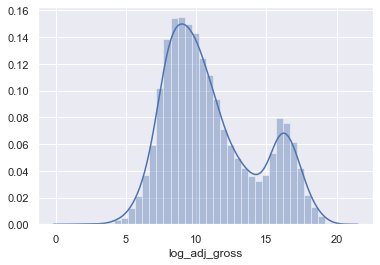

In [37]:
sns.distplot(movies_df['log_adj_gross'])

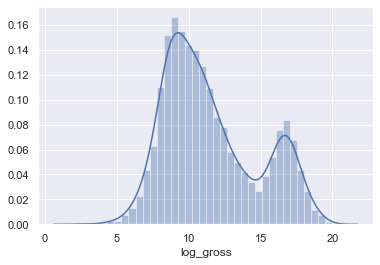

In [38]:
sns.distplot(movies_df['log_gross'])

### 類神經網路

#### 分訓練與測試集

In [39]:
X = movies_df[movies_df['week_boxoffice_level(4)']==1].iloc[:, 1:-8]

In [40]:
# X.drop(columns=['Adventure', 'Fantasy', 'Animation', 'Drama', 'Horror', 'Action', 'Comedy',
#                 'History', 'Thriller', 'Crime', 'Documentary', 'Science Fiction', 'Mystery',
#                 'Romance', 'Family', 'genre_others'], inplace=True)


X.drop(columns=['gdp_deflator'], inplace=True)
X.drop(columns=['Release_year'], inplace=True)
# X.drop(columns=['Release_month'], inplace=True)

In [41]:
X.head()

,Release_month,Release_weekday,release_in_holidayweek,original_language,distributor,belongs_to_collection,homepage,genres,Adventure,Fantasy,...,sentiment_level_before_release,sc2_negative_pc,sc2_neutral_pc,sc2_positive_pc,comments_bf_1wk,comments_bf_2wk,comments_bf_4wk,num_sp_languages,unemployment_rate,gdp_annual_rate
0,12,4,0,14,192,1,1,56,1,1,...,3,0.0,0.0,0.0,0.0,0.0,0.0,2,9.2542,-2.536757
1,6,2,0,14,364,1,0,159,1,0,...,3,0.0,0.0,0.0,0.0,0.0,0.0,2,9.2542,-2.536757
2,7,2,0,14,511,1,1,7,1,1,...,3,0.0,0.0,0.0,0.0,0.0,0.0,1,9.2542,-2.536757
3,11,4,0,14,456,1,0,30,1,1,...,3,0.0,0.0,0.0,0.0,0.0,0.0,2,9.2542,-2.536757
4,5,4,1,14,90,0,1,84,1,0,...,3,0.0,0.0,0.0,0.0,0.0,0.0,1,9.2542,-2.536757


In [189]:
#y = movies_df[movies_df['week_boxoffice_level(4)']==1]['log_gross'].values
#y.shape

(347,)

In [42]:
y = movies_df[movies_df['week_boxoffice_level(4)']==1]['log_adj_gross'].values
y.shape

(292,)

In [140]:
y = (movies_df[movies_df['week_boxoffice_level(4)']==1]['First_week_gross']/1000000).values
y.shape

(347,)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [45]:
print('size of the train data (x):\t', train_X.shape)
print('size of the train data (x):\t', train_y.shape)
print('size of the test data (y):\t', test_X.shape)
print('size of the test data (y):\t', test_y.shape)

size of the train data (x):	 (233, 52)
size of the train data (x):	 (233,)
size of the test data (y):	 (59, 52)
size of the test data (y):	 (59,)


In [46]:
train_y.shape

(233,)

In [47]:
test_y.shape

(59,)

#### 多層類神經網路 Multilayer Perceptron model 

In [48]:
train_X.shape[1]

52

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError

In [83]:
model=Sequential()

model.add(Dense(128, input_shape=(train_X.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("relu"))

# model.add(Dense(200, input_shape=(train_X.shape[1],)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

# model.add(Dense(128))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation("relu"))

# model.add(Dense(32))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation("relu"))

# model.add(Dense(16))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

# model.add(Dense(8))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

model.add(Dense(1))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.compile(loss=MeanSquaredError(),
              optimizer=Adam(lr=0.01, decay=1e-5),
              metrics=['RootMeanSquaredError'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 128)               6784      
_________________________________________________________________
batch_normalization_32 (Batc (None, 128)               512       
_________________________________________________________________
activation_32 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_33 (Batc (None, 64)                256       
_________________________________________________________________
activation_33 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)               

In [84]:
history = model.fit(train_X.values, train_y,
                    epochs=300, 
                    validation_data=(test_X.values, test_y),
                    batch_size=16,
                    verbose=1)

Train on 233 samples, validate on 59 samples
Epoch 1/300
233/233 [==============================] - 1s 5ms/sample - loss: 299.2424 - root_mean_squared_error: 17.2986 - val_loss: 262.0918 - val_root_mean_squared_error: 16.1893
Epoch 2/300
233/233 [==============================] - 0s 291us/sample - loss: 292.6246 - root_mean_squared_error: 17.1063 - val_loss: 248.6245 - val_root_mean_squared_error: 15.7678
Epoch 3/300
233/233 [==============================] - 0s 253us/sample - loss: 286.8575 - root_mean_squared_error: 16.9369 - val_loss: 285.1645 - val_root_mean_squared_error: 16.8868
Epoch 4/300
233/233 [==============================] - 0s 257us/sample - loss: 280.9327 - root_mean_squared_error: 16.7610 - val_loss: 278.0026 - val_root_mean_squared_error: 16.6734
Epoch 5/300
233/233 [==============================] - 0s 257us/sample - loss: 275.6467 - root_mean_squared_error: 16.6026 - val_loss: 264.8285 - val_root_mean_squared_error: 16.2736
Epoch 6/300
233/233 [=====================

233/233 [==============================] - 0s 261us/sample - loss: 40.6516 - root_mean_squared_error: 6.3759 - val_loss: 19.6947 - val_root_mean_squared_error: 4.4379
Epoch 91/300
233/233 [==============================] - 0s 257us/sample - loss: 38.2277 - root_mean_squared_error: 6.1829 - val_loss: 18.7652 - val_root_mean_squared_error: 4.3319
Epoch 92/300
233/233 [==============================] - 0s 255us/sample - loss: 40.2599 - root_mean_squared_error: 6.3451 - val_loss: 17.9359 - val_root_mean_squared_error: 4.2351
Epoch 93/300
233/233 [==============================] - 0s 268us/sample - loss: 39.4018 - root_mean_squared_error: 6.2771 - val_loss: 17.4931 - val_root_mean_squared_error: 4.1825
Epoch 94/300
233/233 [==============================] - 0s 253us/sample - loss: 37.4841 - root_mean_squared_error: 6.1224 - val_loss: 17.0044 - val_root_mean_squared_error: 4.1236
Epoch 95/300
233/233 [==============================] - 0s 257us/sample - loss: 36.5436 - root_mean_squared_error

233/233 [==============================] - 0s 261us/sample - loss: 26.8946 - root_mean_squared_error: 5.1860 - val_loss: 0.3629 - val_root_mean_squared_error: 0.6024
Epoch 181/300
233/233 [==============================] - 0s 248us/sample - loss: 21.9354 - root_mean_squared_error: 4.6835 - val_loss: 0.5023 - val_root_mean_squared_error: 0.7088
Epoch 182/300
233/233 [==============================] - 0s 253us/sample - loss: 22.9130 - root_mean_squared_error: 4.7867 - val_loss: 0.4097 - val_root_mean_squared_error: 0.6401
Epoch 183/300
233/233 [==============================] - 0s 261us/sample - loss: 23.4666 - root_mean_squared_error: 4.8442 - val_loss: 0.3550 - val_root_mean_squared_error: 0.5958
Epoch 184/300
233/233 [==============================] - 0s 261us/sample - loss: 25.3045 - root_mean_squared_error: 5.0304 - val_loss: 0.3330 - val_root_mean_squared_error: 0.5770
Epoch 185/300
233/233 [==============================] - 0s 248us/sample - loss: 23.8875 - root_mean_squared_error

233/233 [==============================] - 0s 261us/sample - loss: 0.4180 - root_mean_squared_error: 0.6465 - val_loss: 1.7016 - val_root_mean_squared_error: 1.3045
Epoch 271/300
233/233 [==============================] - 0s 257us/sample - loss: 0.4132 - root_mean_squared_error: 0.6428 - val_loss: 1.4975 - val_root_mean_squared_error: 1.2237
Epoch 272/300
233/233 [==============================] - 0s 248us/sample - loss: 0.4109 - root_mean_squared_error: 0.6410 - val_loss: 0.5037 - val_root_mean_squared_error: 0.7097
Epoch 273/300
233/233 [==============================] - 0s 261us/sample - loss: 0.4102 - root_mean_squared_error: 0.6405 - val_loss: 0.3195 - val_root_mean_squared_error: 0.5653
Epoch 274/300
233/233 [==============================] - 0s 261us/sample - loss: 0.3746 - root_mean_squared_error: 0.6121 - val_loss: 2.3028 - val_root_mean_squared_error: 1.5175
Epoch 275/300
233/233 [==============================] - 0s 248us/sample - loss: 0.3927 - root_mean_squared_error: 0.62

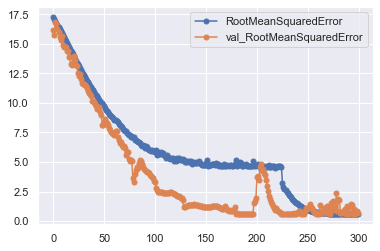

In [85]:
fig = plt.figure()
plt.plot(history.history['root_mean_squared_error'], ms=5,marker='o', label='RootMeanSquaredError')
plt.plot(history.history['val_root_mean_squared_error'], ms=5,marker='o', label='val_RootMeanSquaredError')
plt.legend()
plt.show()

In [82]:
pred_y = model.predict(test_X)

In [83]:
def get_accuracy(test, pred, rate):
    actual_gross = np.exp(test)
    pred_gross = np.exp(pred)
    upper = actual_gross * (1 + rate/100)
    lower = actual_gross * (1 - rate/100)
    tp, tn = 0, 0
    for item in zip(pred_gross, upper, lower):
        if item[0] >= item[2] and item[0] <= item[1]:
            tp += 1
        else:
            tn += 1
    accuracy = tp / (tp + tn)
    return accuracy

In [84]:
def get_accuracy2(test, pred, rate):
    actual_gross = test
    pred_gross = pred
    upper = actual_gross * (1 + rate/100)
    lower = actual_gross * (1 - rate/100)
    tp, tn = 0, 0
    for item in zip(pred_gross, upper, lower):
        if item[0] >= item[2] and item[0] <= item[1]:
            tp += 1
        else:
            tn += 1
    accuracy = tp / (tp + tn)
    return accuracy

In [85]:
get_accuracy(test_y,pred_y.flatten(), 10)

0.06976744186046512

In [206]:
get_accuracy2(test_y,pred_y.flatten(), 10)

0.8952380952380953

In [86]:
for rate in list(range(10,100,5)):
    result = get_accuracy(test_y, pred_y.flatten(), rate)
    print(f'rate:{rate}%, {result}')

rate:10%, 0.06976744186046512
rate:15%, 0.06976744186046512
rate:20%, 0.09302325581395349
rate:25%, 0.11627906976744186
rate:30%, 0.2558139534883721
rate:35%, 0.3953488372093023
rate:40%, 0.4883720930232558
rate:45%, 0.5116279069767442
rate:50%, 0.627906976744186
rate:55%, 0.6511627906976745
rate:60%, 0.7441860465116279
rate:65%, 0.813953488372093
rate:70%, 0.8604651162790697
rate:75%, 0.9069767441860465
rate:80%, 0.9069767441860465
rate:85%, 0.9302325581395349
rate:90%, 0.9534883720930233
rate:95%, 0.9534883720930233
